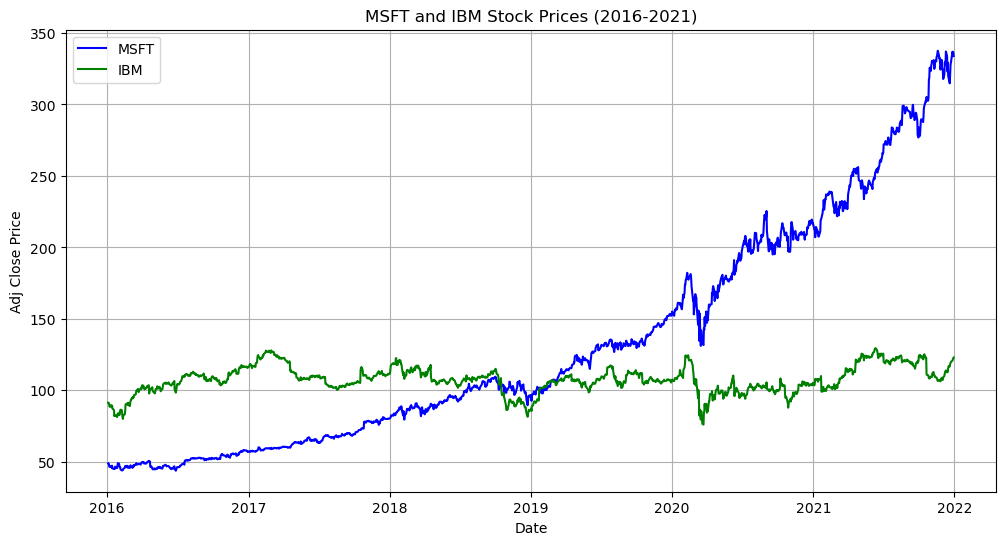

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the updated CSV files
msft_data = pd.read_csv(r"C:\Users\aniru\AlphaVision\MSFT_financial_data_updated.csv")
ibm_data = pd.read_csv(r"C:\Users\aniru\AlphaVision\IBM_financial_data_updated.csv")

# Convert the 'Date' column to datetime
msft_data['Date'] = pd.to_datetime(msft_data['Date'])
ibm_data['Date'] = pd.to_datetime(ibm_data['Date'])

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(msft_data['Date'], msft_data['Adj Close'], label='MSFT', color='blue')
plt.plot(ibm_data['Date'], ibm_data['Adj Close'], label='IBM', color='green')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('MSFT and IBM Stock Prices (2016-2021)')
plt.legend()
plt.grid(True)
plt.show()


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1510
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3545.089
Date:                Wed, 01 Nov 2023   AIC                           7102.178
Time:                        08:32:43   BIC                           7134.093
Sample:                             0   HQIC                          7114.064
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2024      0.013    -15.267      0.000      -0.228      -0.176
ar.L2          0.0370      0.014      2.640      0.008       0.010       0.064
ar.L3          0.0250      0.016      1.578      0.1

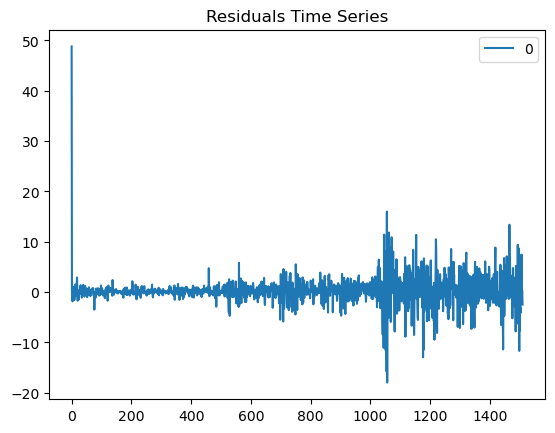

In [4]:
#time series analysis
from statsmodels.tsa.arima.model import ARIMA

# Example: Fit ARIMA model to MSFT data
msft_adj_close = msft_data['Adj Close']

# Fit ARIMA model
model = ARIMA(msft_adj_close, order=(5, 1, 0))  # Example order - you can adjust it
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals Time Series')
plt.show()


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1510
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2880.702
Date:                Wed, 01 Nov 2023   AIC                           5773.403
Time:                        08:38:12   BIC                           5805.318
Sample:                             0   HQIC                          5785.289
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0558      0.019     -2.957      0.003      -0.093      -0.019
ar.L2          0.0313      0.016      1.908      0.056      -0.001       0.063
ar.L3          0.0102      0.017      0.600      0.5

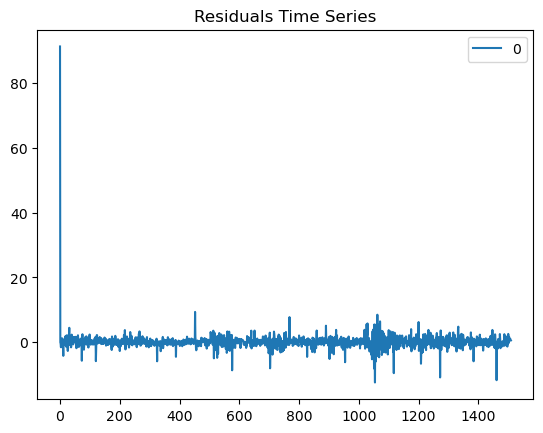

In [8]:
#time series analysis
from statsmodels.tsa.arima.model import ARIMA

# Example: Fit ARIMA model to IBM data
ibm_adj_close = ibm_data['Adj Close']

# Fit ARIMA model
model = ARIMA(ibm_adj_close, order=(5, 1, 0))  # Example order - you can adjust it
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals Time Series')
plt.show()

C:\Users\aniru\AppData\Local\Temp\ipykernel_13072\2521254008.py:8: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=msft_data['Date'].iloc[-1], periods=forecast_steps + 1, closed='right')


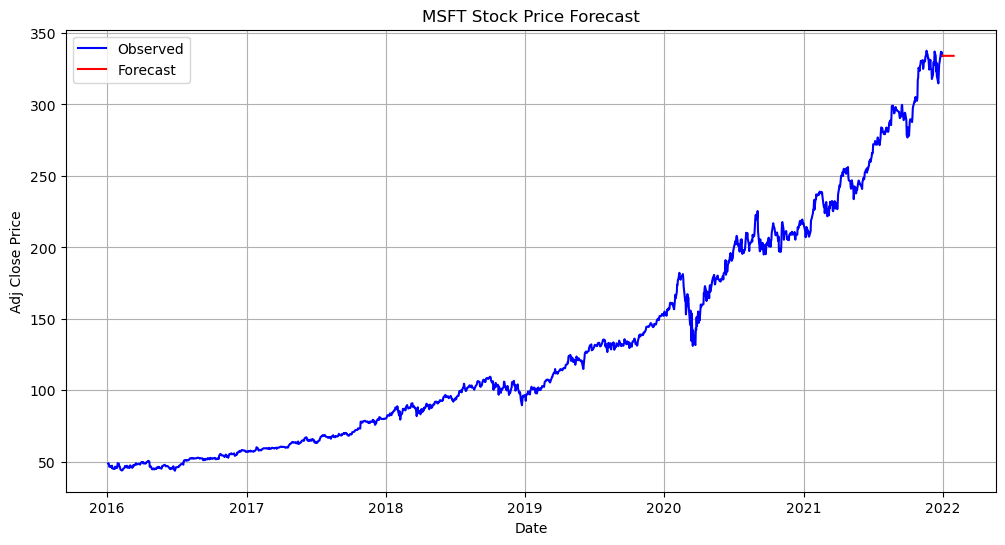

In [6]:
# Forecast future values
forecast_steps = 30  # Change this value based on your needs
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(msft_data['Date'], msft_adj_close, label='Observed', color='blue')
forecast_index = pd.date_range(start=msft_data['Date'].iloc[-1], periods=forecast_steps + 1, closed='right')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('MSFT Stock Price Forecast')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\aniru\AppData\Local\Temp\ipykernel_13072\3678679625.py:8: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=ibm_data['Date'].iloc[-1], periods=forecast_steps + 1, closed='right')


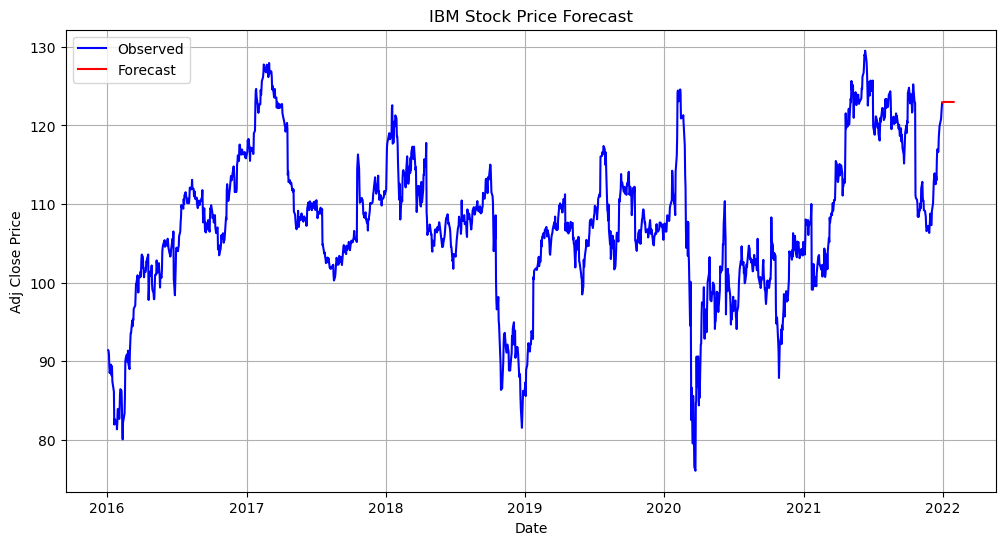

In [9]:
# forecasting future values
forecast_steps = 30  # Change this value based on your needs
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(msft_data['Date'], ibm_adj_close, label='Observed', color='blue')
forecast_index = pd.date_range(start=ibm_data['Date'].iloc[-1], periods=forecast_steps + 1, closed='right')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('IBM Stock Price Forecast')
plt.legend()
plt.grid(True)
plt.show()